NAME:SAGNIK BHOWMICK
ROLL:23MS007

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic map function
def logistic_map(x, r):
    return r * x * (1 - x)

# Parameters
r = 3.9  # Control parameter for the logistic map
n_iterations = 1000
n_trials = 100  # Number of trajectories to average over
delta_x0 = 1e-6  # Initial perturbation size

# Initialize arrays to store Lyapunov exponent estimates
lambda_estimates = np.zeros(n_trials)

for trial in range(n_trials):
    # Generate initial state and perturbation
    x0 = np.random.random()  # Initial state
    x0_prime = x0 + delta_x0  # Perturbed initial state

    # Arrays to store trajectory points
    trajectory = np.zeros(n_iterations)
    trajectory_prime = np.zeros(n_iterations)

    # Initialize trajectories
    trajectory[0] = x0
    trajectory_prime[0] = x0_prime

    # Evolve both trajectories
    for t in range(1, n_iterations):
        trajectory[t] = logistic_map(trajectory[t-1], r)
        trajectory_prime[t] = logistic_map(trajectory_prime[t-1], r)

    # Calculate distances between trajectories
    distances = np.abs(trajectory - trajectory_prime)

    # Estimate Lyapunov exponent
    lambda_estimate = np.mean(np.log(distances[1:] / delta_x0))
    lambda_estimates[trial] = lambda_estimate

# Average Lyapunov exponent over trials
avg_lambda = np.mean(lambda_estimates)

print(f"Average Lyapunov exponent: {avg_lambda}")


Average Lyapunov exponent: 12.088340981172273


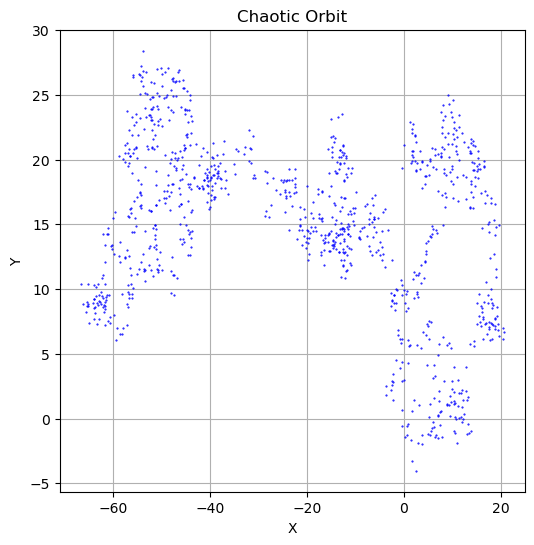

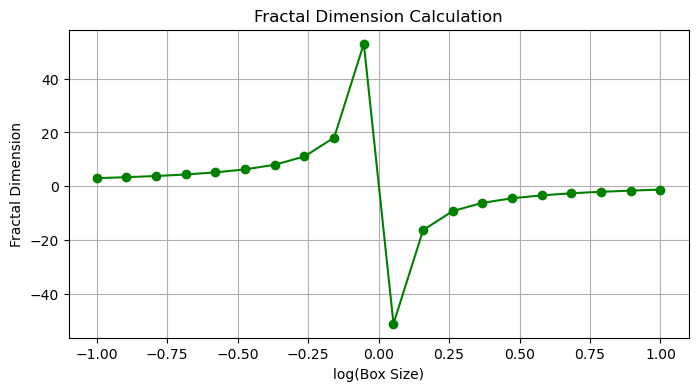

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate chaotic orbit data (example)
np.random.seed(0)
num_points = 1000
x = np.cumsum(np.random.randn(num_points))
y = np.cumsum(np.random.randn(num_points))

# Plot the chaotic orbit
plt.figure(figsize=(6, 6))
plt.plot(x, y, '.', markersize=1, color='blue')
plt.title('Chaotic Orbit')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Calculate fractal dimension using box-counting method
def fractal_dimension(x, y, box_size):
    min_x, max_x = np.min(x), np.max(x)
    min_y, max_y = np.min(y), np.max(y)
    num_boxes_x = int((max_x - min_x) / box_size)
    num_boxes_y = int((max_y - min_y) / box_size)
    counts = np.zeros((num_boxes_x, num_boxes_y))

    for i in range(num_boxes_x):
        for j in range(num_boxes_y):
            box_x_min = min_x + i * box_size
            box_x_max = box_x_min + box_size
            box_y_min = min_y + j * box_size
            box_y_max = box_y_min + box_size

            counts[i, j] = np.sum((x >= box_x_min) & (x < box_x_max) & (y >= box_y_min) & (y < box_y_max))

    nonzero_counts = np.sum(counts > 0)
    return -np.log(nonzero_counts) / np.log(box_size)

# Perform box counting over multiple box sizes
box_sizes = np.logspace(-1, 1, num=20)
fractal_dimensions = []
for box_size in box_sizes:
    fractal_dimensions.append(fractal_dimension(x, y, box_size))

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(np.log10(box_sizes), fractal_dimensions, marker='o', linestyle='-', color='green')
plt.title('Fractal Dimension Calculation')
plt.xlabel('log(Box Size)')
plt.ylabel('Fractal Dimension')
plt.grid(True)

plt.show()


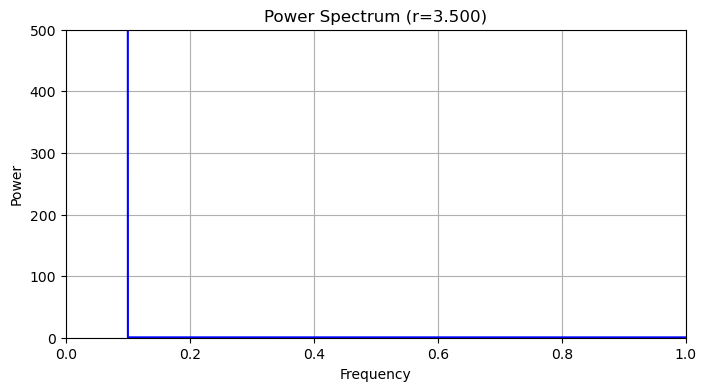

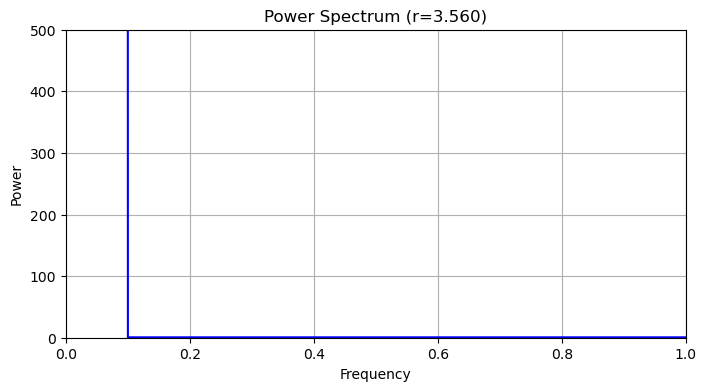

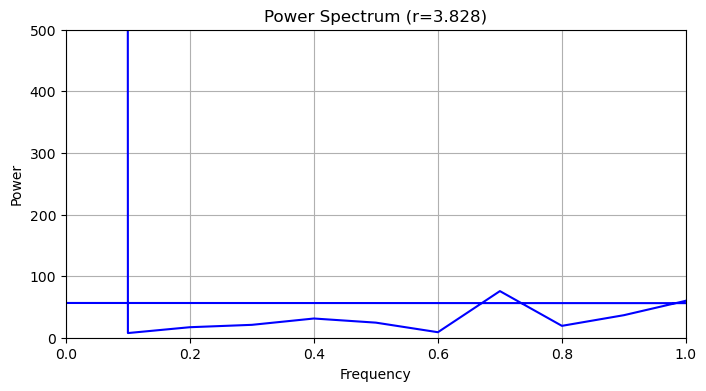

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate logistic map data
def logistic_map(r, x0, n):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, n):
        x[i] = r * x[i-1] * (1 - x[i-1])
    return x

# Function to compute power spectrum
def compute_power_spectrum(x, dt):
    n = len(x)
    freqs = np.fft.fftfreq(n, dt)
    fft_vals = np.fft.fft(x)
    psd = np.abs(fft_vals)**2
    return freqs, psd

# Parameters
n_steps = 1000    # Number of time steps
dt = 0.01         # Time step size
r_values = [3.5, 3.56, 3.828]  # Selected parameter values for r
x0 = 0.1          # Initial condition

# Iterate over selected values of r
for r in r_values:
    # Generate logistic map data
    x = logistic_map(r, x0, n_steps)
    
    # Compute power spectrum
    freqs, psd = compute_power_spectrum(x, dt)
    
    # Plot power spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='blue')
    plt.title(f'Power Spectrum (r={r:.3f})')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.xlim(0, 1)  # Limit frequency range for clarity
    plt.ylim(0, 500)  # Limit power range for clarity
    plt.grid(True)
    plt.show()


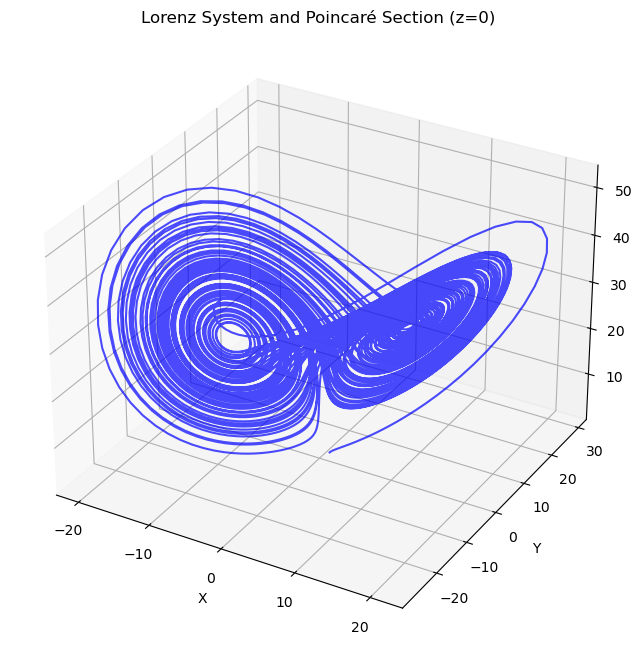

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz system function
def lorenz_system(t, xyz, sigma=10.0, beta=8/3, rho=28.0):
    x, y, z = xyz
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Parameters
sigma = 10.0
beta = 8/3
rho = 28.0
initial_conditions = [1.0, 1.0, 1.0]
timesteps = 10000
dt = 0.01

# Function to compute the trajectory
def compute_trajectory(system, initial_conditions, timesteps, dt):
    t = np.arange(0, timesteps * dt, dt)
    xyz = np.zeros((timesteps, 3))
    xyz[0] = initial_conditions
    
    for i in range(1, timesteps):
        xyz[i] = xyz[i-1] + np.array(system(t[i-1], xyz[i-1])) * dt
    
    return xyz

# Compute the trajectory
xyz = compute_trajectory(lorenz_system, initial_conditions, timesteps, dt)

# Define the Poincaré section function
def poincare_section(xyz, plane_value=0, plane_axis=2):
    sections = []
    for i in range(1, len(xyz)):
        if xyz[i-1][plane_axis] <= plane_value and xyz[i][plane_axis] > plane_value:
            sections.append(xyz[i])
        elif xyz[i-1][plane_axis] >= plane_value and xyz[i][plane_axis] < plane_value:
            sections.append(xyz[i])
    return np.array(sections)

# Compute Poincaré section
poincare_plane = 0  # Plane z=0
poincare_axis = 2   # Axis z
poincare_points = poincare_section(xyz, poincare_plane, poincare_axis)

# Extract coordinates for scatter plot
poincare_points_x = [point[0] for point in poincare_points]
poincare_points_y = [point[1] for point in poincare_points]
poincare_points_z = [point[2] for point in poincare_points]

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xyz[:, 0], xyz[:, 1], xyz[:, 2], color='blue', alpha=0.7)
ax.scatter(poincare_points_x, poincare_points_y, poincare_points_z, color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System and Poincaré Section (z=0)')
plt.show()


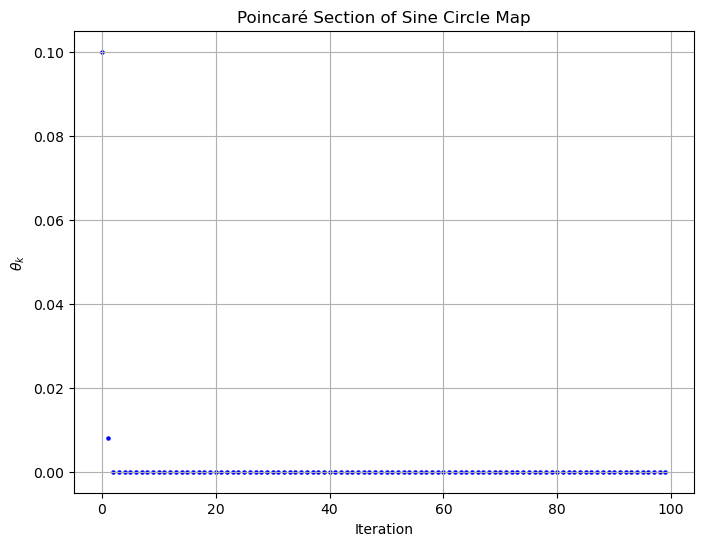

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute sine circle map trajectory
def sine_circle_map(omega, N, initial_theta, steps):
    theta = np.zeros(steps)
    theta[0] = initial_theta
    
    for k in range(1, steps):
        theta[k] = theta[k-1] + omega - (2 * np.pi * k / N) * np.sin(2 * np.pi * theta[k-1])
        theta[k] = theta[k] % 1.0  # Ensure theta stays within [0, 1)
    
    return theta

# Parameters
omega = 1.0       # Angular velocity parameter
N = 1000          # Normalization factor
initial_theta = 0.1  # Initial angle
steps = 1000      # Number of steps

# Compute trajectory
theta = sine_circle_map(omega, N, initial_theta, steps)

# Plotting Poincaré section
poincare_points = theta[::10]  # Select every 10th point for clarity

plt.figure(figsize=(8, 6))
plt.scatter(range(len(poincare_points)), poincare_points, marker='o', s=5, color='blue')
plt.xlabel('Iteration')
plt.ylabel(r'$\theta_k$')
plt.title('Poincaré Section of Sine Circle Map')
plt.grid(True)
plt.show()


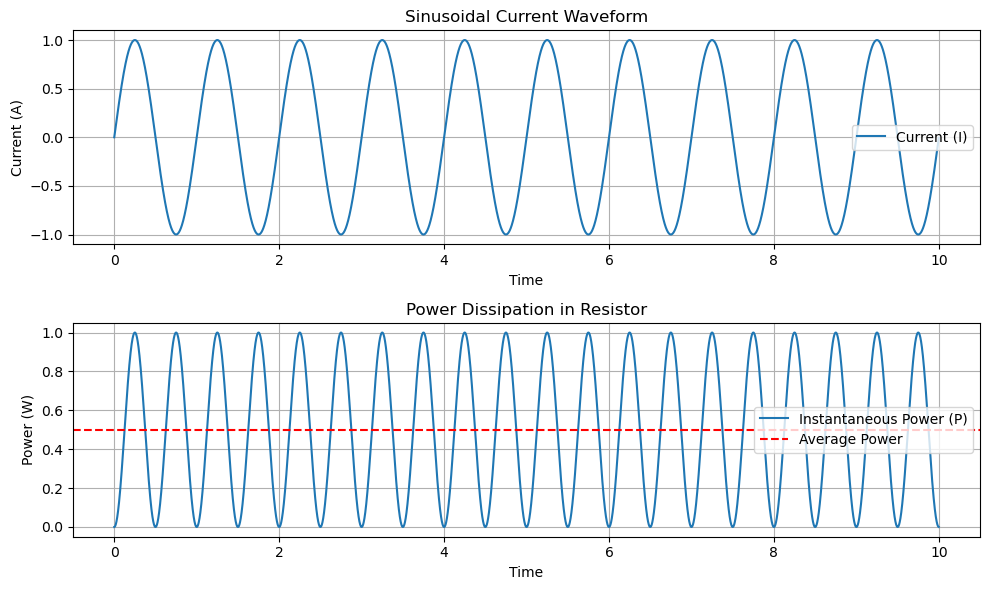

Mean Square Current (I^2): 0.5000
Average Power Dissipation: 0.5000 W


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 1.0  # Resistor value in ohms

# Time parameters
dt = 0.001  # Time step
t_max = 10.0  # Maximum time

# Time array
t = np.arange(0, t_max, dt)

# Sinusoidal current waveform parameters
freq = 1.0  # Frequency of the sinusoidal waveform
I0 = 1.0    # Amplitude of the sinusoidal current waveform

# Sinusoidal current waveform
I = I0 * np.sin(2 * np.pi * freq * t)

# Power dissipation calculation
P_inst = I**2 * R  # Instantaneous power dissipation
P_avg = np.mean(P_inst)  # Average power dissipation (mean square value of current)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, I, label='Current (I)')
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Sinusoidal Current Waveform')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, P_inst, label='Instantaneous Power (P)')
plt.axhline(y=P_avg, color='r', linestyle='--', label='Average Power')
plt.xlabel('Time')
plt.ylabel('Power (W)')
plt.title('Power Dissipation in Resistor')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Mean Square Current (I^2): {np.mean(I**2):.4f}")
print(f"Average Power Dissipation: {P_avg:.4f} W")


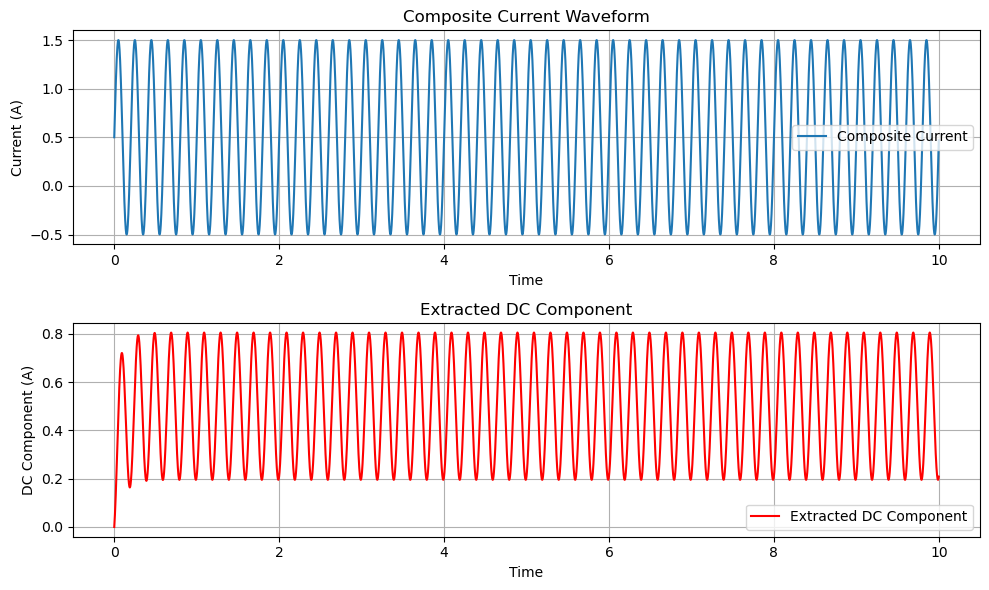

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
dt = 0.001       # Time step
t_max = 10.0     # Maximum time
t = np.arange(0, t_max, dt)

# Generate a composite waveform with DC and AC components
frequency = 5.0   # Frequency of the AC component
amplitude_AC = 1.0
amplitude_DC = 0.5
I_AC = amplitude_AC * np.sin(2 * np.pi * frequency * t)
I_DC = amplitude_DC * np.ones_like(t)
I_composite = I_DC + I_AC

# Design a simple DC extraction mechanism (low-pass filter approach)
def extract_dc_component(signal, alpha=0.01):
    dc_component = np.zeros_like(signal)
    for i in range(1, len(signal)):
        dc_component[i] = (1 - alpha) * dc_component[i - 1] + alpha * signal[i]
    return dc_component

# Extract DC component from the composite waveform
alpha = 0.01   # Smoothing factor for the filter (adjustable parameter)
I_DC_extracted = extract_dc_component(I_composite, alpha)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, I_composite, label='Composite Current')
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Composite Current Waveform')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, I_DC_extracted, label='Extracted DC Component', color='r')
plt.xlabel('Time')
plt.ylabel('DC Component (A)')
plt.title('Extracted DC Component')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


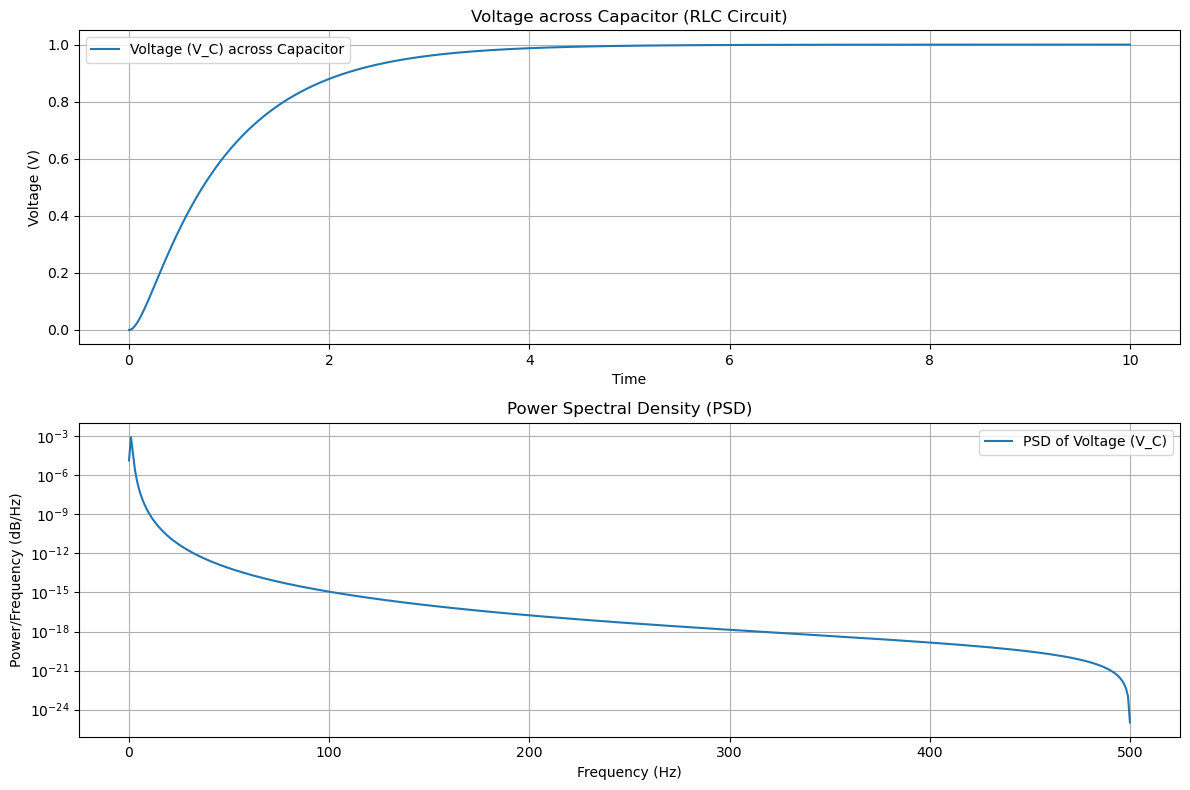

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Constants and parameters
dt = 0.001       # Time step
t_max = 10.0     # Maximum time
t = np.arange(0, t_max, dt)

# Circuit parameters
R = 10.0         # Resistance (ohms)
L = 1.0          # Inductance (henries)
C = 0.1          # Capacitance (farads)
V_in = 1.0       # Input voltage amplitude

# Function to simulate RLC circuit
def simulate_RLC_circuit():
    # Initialize variables
    I = np.zeros_like(t)   # Current through the inductor
    V_C = np.zeros_like(t) # Voltage across the capacitor
    
    # Simulate the circuit
    for i in range(1, len(t)):
        # Compute derivatives using differential equations for RLC circuit
        dI = (V_in - R * I[i-1] - V_C[i-1]) / L
        dV_C = I[i-1] / C
        
        # Update variables using Euler's method
        I[i] = I[i-1] + dI * dt
        V_C[i] = V_C[i-1] + dV_C * dt
        
    return V_C

# Simulate RLC circuit and collect time series data (voltage across capacitor)
V_C = simulate_RLC_circuit()

# Perform spectral analysis (Power Spectral Density estimation)
frequencies, psd = welch(V_C, fs=1/dt, nperseg=1024)

# Plotting time series data and spectral characteristics
plt.figure(figsize=(12, 8))

# Plot time series data (voltage across capacitor)
plt.subplot(2, 1, 1)
plt.plot(t, V_C, label='Voltage (V_C) across Capacitor')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage across Capacitor (RLC Circuit)')
plt.grid(True)
plt.legend()

# Plot Power Spectral Density (PSD)
plt.subplot(2, 1, 2)
plt.semilogy(frequencies, psd, label='PSD of Voltage (V_C)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


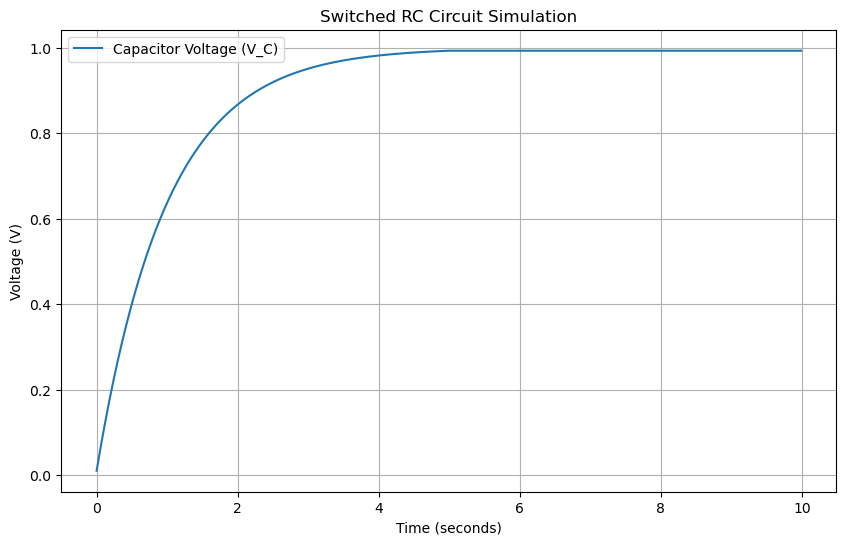

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Circuit parameters
R = 1.0         # Resistance (ohms)
C = 1.0         # Capacitance (farads)
V_in = 1.0      # Input voltage (volts)
t_max = 10.0    # Maximum time (seconds)
dt = 0.01       # Time step (seconds)

# Initial conditions
V_C = 0.0       # Initial voltage across the capacitor (volts)

# Time array
t = np.arange(0, t_max, dt)

# Function to simulate the switched RC circuit
def simulate_switched_RC():
    global V_C  # Declare V_C as global
    
    V_C_values = []
    switch_on = True  # Start with switch closed
    
    for time in t:
        if time >= t_max / 2:  # Switching event at half time
            switch_on = False
        
        if switch_on:
            # On state: switch closed
            dV_C = (V_in - V_C) / (R * C)
            V_C += dV_C * dt  # Update capacitor voltage
        else:
            # Off state: switch open
            dV_C = 0.0
        
        # Store the voltage across the capacitor
        V_C_values.append(V_C)
    
    return V_C_values

# Simulate the switched RC circuit
V_C_values = simulate_switched_RC()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, V_C_values, label='Capacitor Voltage (V_C)')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Switched RC Circuit Simulation')
plt.grid(True)
plt.legend()
plt.show()


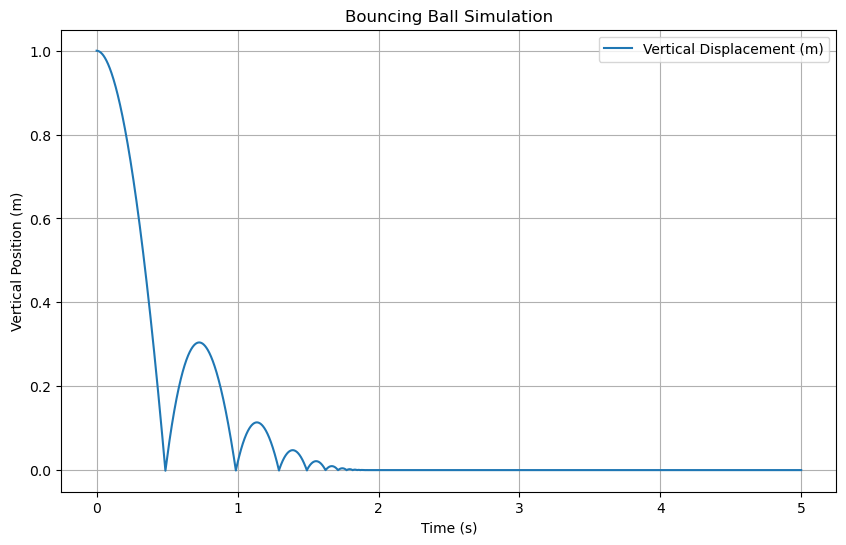

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81        # acceleration due to gravity (m/s^2)
m = 0.1         # mass of the ball (kg)
c = 0.1         # damping coefficient
e = 0.7         # coefficient of restitution (bounce efficiency)
dt = 0.001      # time step (s)
t_max = 5.0     # maximum time (s)
y0 = 1.0        # initial height (m)
v0 = 0.0        # initial velocity (m/s)

# Arrays to store results
t_list = np.arange(0, t_max, dt)
y_list = np.zeros_like(t_list)
v_list = np.zeros_like(t_list)

# Initial conditions
y_list[0] = y0
v_list[0] = v0

# Simulation loop
for i in range(1, len(t_list)):
    # Check for collision with ground
    if y_list[i-1] <= 0:
        # Collision handling
        y_list[i] = -e * y_list[i-1]    # Reflect position with restitution
        v_list[i] = -e * v_list[i-1]    # Reflect velocity with restitution

    else:
        # Free fall dynamics
        acceleration = -g - (c / m) * v_list[i-1]
        v_list[i] = v_list[i-1] + acceleration * dt
        y_list[i] = y_list[i-1] + v_list[i] * dt

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(t_list, y_list, label='Vertical Displacement (m)')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Position (m)')
plt.title('Bouncing Ball Simulation')
plt.grid(True)
plt.legend()
plt.show()


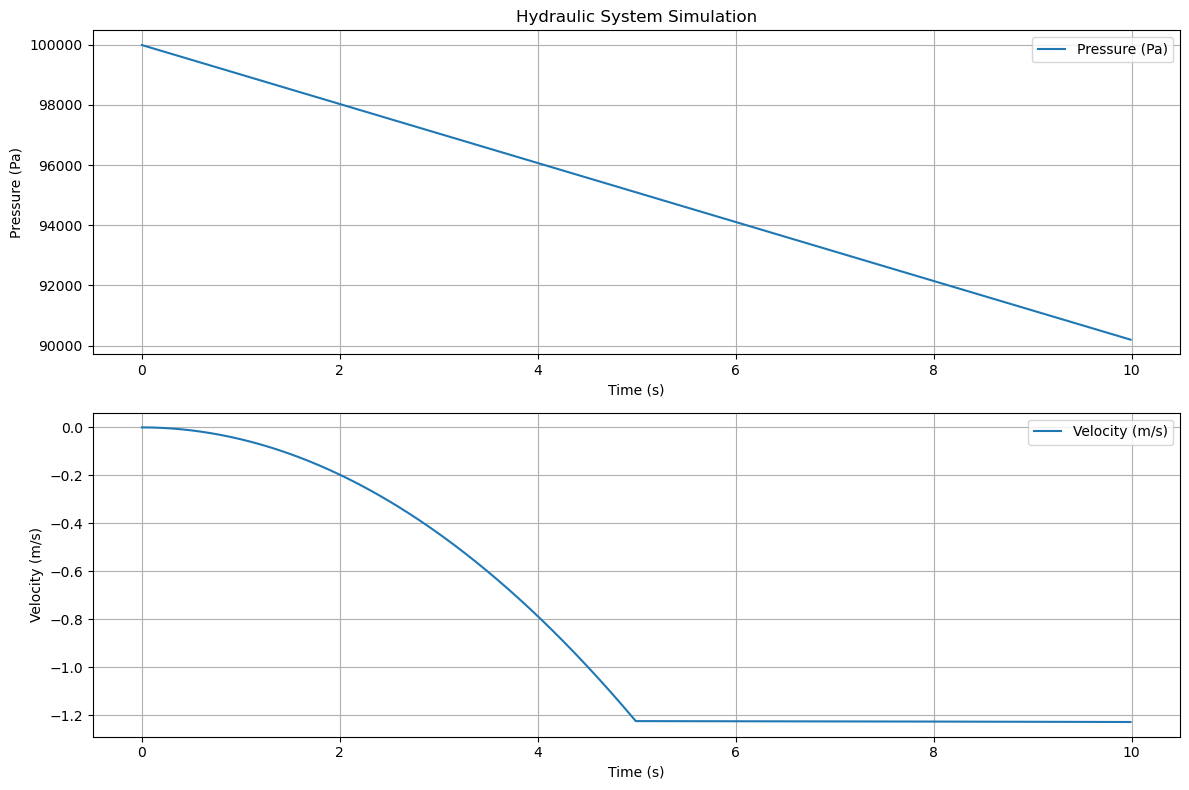

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho = 1000.0     # density of fluid (kg/m^3)
A = 0.01         # cross-sectional area of the cylinder (m^2)
g = 9.81         # acceleration due to gravity (m/s^2)
L = 0.1          # length of the cylinder (m)
Cd = 0.7         # discharge coefficient for valves
K_open = 1.0e-3  # valve conductance when open (m^3/s/Pa)
K_closed = 1.0e-6 # valve conductance when closed (m^3/s/Pa)

# Initial conditions
P0 = 100000.0    # initial pressure in the cylinder (Pa)
V0 = 0.0         # initial velocity of fluid (m/s)

# Time parameters
dt = 0.01        # time step (s)
t_max = 10.0     # maximum simulation time (s)

# Arrays to store results
t_list = np.arange(0, t_max, dt)
P_list = np.zeros_like(t_list)
V_list = np.zeros_like(t_list)

# Function to simulate hydraulic system
def simulate_hydraulic_system():
    # Initialize variables
    P = P0
    V = V0
    
    # Simulation loop
    for i in range(len(t_list)):
        # Check valve state (simple on-off control for illustration)
        if t_list[i] < t_max / 2:
            # Valve open
            K = K_open
        else:
            # Valve closed
            K = K_closed
        
        # Calculate derivatives
        dPdt = -Cd * np.sqrt(np.abs(V)) * np.sign(V) - rho * g * A / L
        dVdt = K * (P - P0) / rho / A
        
        # Update variables using Euler's method
        P += dPdt * dt
        V += dVdt * dt
        
        # Store results
        P_list[i] = P
        V_list[i] = V
    
    return P_list, V_list

# Perform simulation
P_results, V_results = simulate_hydraulic_system()

# Plotting results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_list, P_results, label='Pressure (Pa)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.title('Hydraulic System Simulation')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_list, V_results, label='Velocity (m/s)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


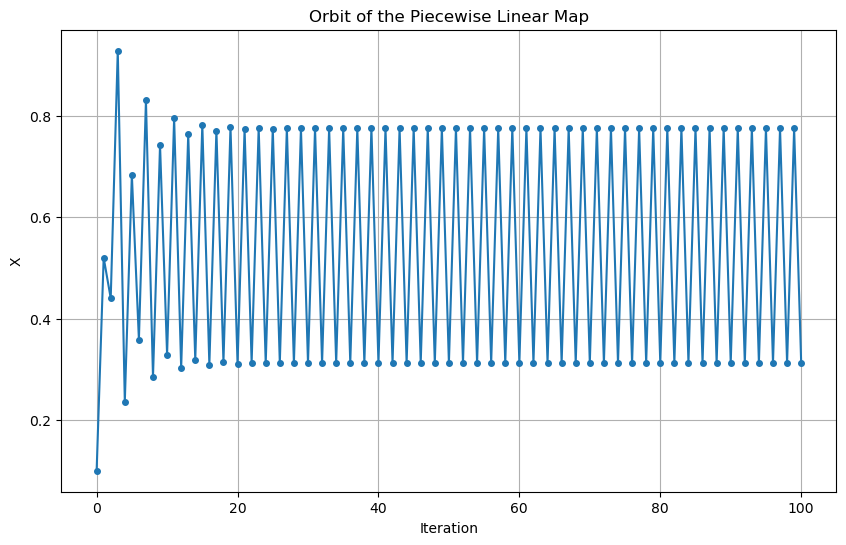

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the map
a = 1.2  # slope of the linear part
b = 0.4  # y-intercept of the linear part
c = -0.5  # slope of the second linear part
d = 0.7  # y-intercept of the second linear part

# Define the piecewise linear map
def piecewise_linear_map(x):
    if x <= 0.5:
        return a * x + b
    else:
        return c * x + d

# Function to generate orbit of the map
def generate_orbit(x0, iterations):
    orbit = [x0]
    for i in range(iterations):
        x_next = piecewise_linear_map(orbit[-1])
        orbit.append(x_next)
    return orbit

# Parameters
x0 = 0.1  # initial condition
iterations = 100  # number of iterations

# Generate orbit
orbit = generate_orbit(x0, iterations)

# Plotting the orbit
plt.figure(figsize=(10, 6))
plt.plot(orbit, linestyle='-', marker='o', markersize=4)
plt.title('Orbit of the Piecewise Linear Map')
plt.xlabel('Iteration')
plt.ylabel('X')
plt.grid(True)
plt.show()


THIS IS AN EXTRA SIMULATION I MADE.The potential is a harmonic oscillator potential multiplied by a cosine oscillation term.Floquet theory is applied to study the system's dynamics under periodic driving. It allows us to find quasi-energy states (or Floquet states) and quasi-energies that describe the system's behavior in the presence of periodic perturbations.


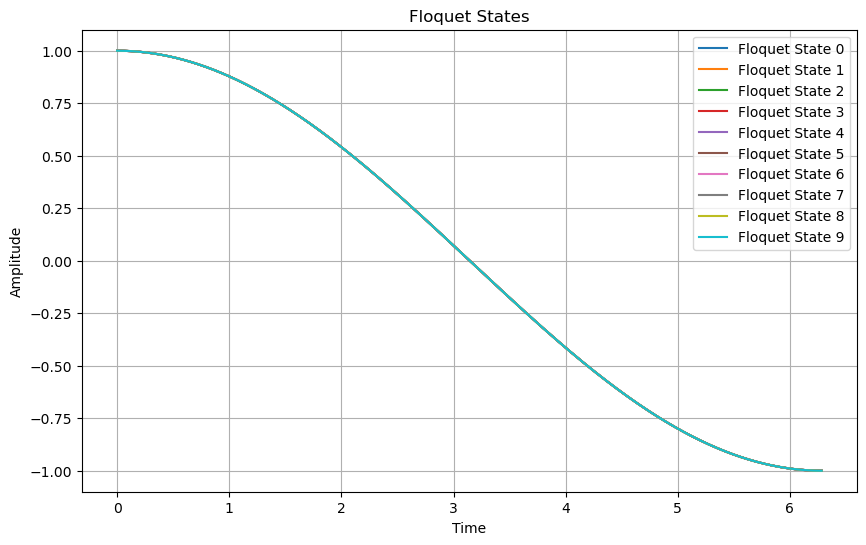

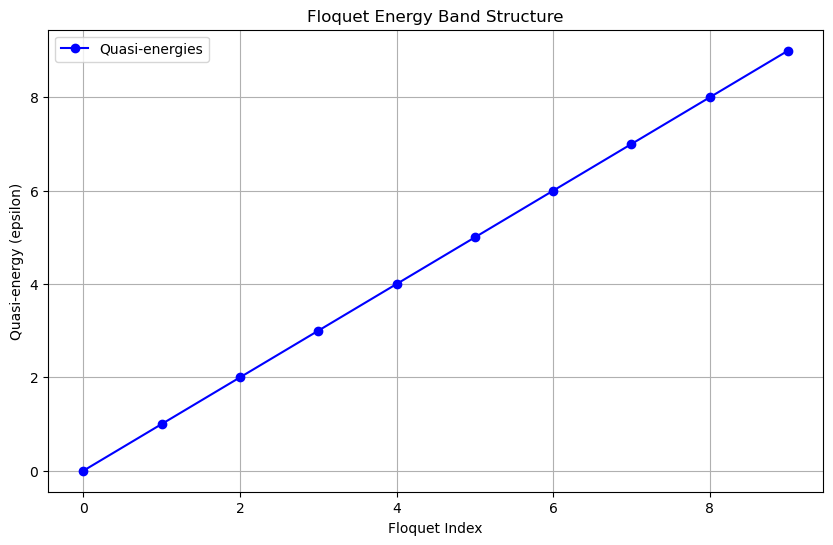

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
hbar = 1.0  # Reduced Planck's constant
omega = 1.0  # Angular frequency of the driving potential
num_floquet_states = 10  # Number of Floquet states to compute
T = 2 * np.pi / omega  # Period of the driving potential

# Time discretization
timesteps = 1000
dt = T / timesteps
times = np.linspace(0, T, timesteps)

# Define the potential function (e.g., harmonic oscillator with a periodic drive)
def potential(q, t):
    return 0.5 * omega**2 * q**2 * np.cos(omega * t)

# Define the time-dependent Hamiltonian
def time_dependent_H(q, t):
    return 0.5 * (1.0 + omega ** 2 * q ** 2) + potential(q, t)

# Initialize arrays to store results
quasi_energies = []
floquet_states = []

# Numerically solve the Floquet problem
for alpha in range(num_floquet_states):
    # Initial state in the Floquet basis
    psi_alpha = np.exp(-1j * alpha * omega * times[0]) * np.ones_like(times)

    # Evolve the state using the time-dependent Hamiltonian
    for i in range(1, timesteps):
        H_t = time_dependent_H(0, times[i])
        psi_alpha[i] = np.dot(np.exp(-1j * H_t * dt / hbar), psi_alpha[i-1])

    # Store Floquet state and quasi-energy
    floquet_states.append(psi_alpha)
    quasi_energies.append(alpha * omega)

# Plot energy band structure and Floquet states
plt.figure(figsize=(10, 6))
for alpha in range(num_floquet_states):
    plt.plot(times, np.real(floquet_states[alpha]), label=f'Floquet State {alpha}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Floquet States')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(quasi_energies, marker='o', linestyle='-', color='b', label='Quasi-energies')
plt.xlabel('Floquet Index')
plt.ylabel('Quasi-energy (epsilon)')
plt.title('Floquet Energy Band Structure')
plt.legend()
plt.grid(True)
plt.show()
